In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.iloc[1]

0       burgers
1     meatballs
2          eggs
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
Name: 1, dtype: object

In [14]:
df.iloc[1].dropna()

0      burgers
1    meatballs
2         eggs
Name: 1, dtype: object

In [15]:
df.iloc[1].dropna().to_list()

['burgers', 'meatballs', 'eggs']

In [16]:
## Creating lists from the dataset
transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().to_list()
    transactions.append(row)

In [45]:
transactions[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

In [26]:
## Counting the frequencies in percentages
items = df.stack()
items

0     0             shrimp
      1            almonds
      2            avocado
      3     vegetables mix
      4       green grapes
                ...       
7499  1          green tea
7500  0               eggs
      1    frozen smoothie
      2        yogurt cake
      3     low fat yogurt
Length: 29363, dtype: object

In [28]:
frequencies = items.value_counts(normalize=True)
frequencies

mineral water    0.060893
eggs             0.045908
spaghetti        0.044478
french fries     0.043660
chocolate        0.041889
                   ...   
bramble          0.000477
cream            0.000238
napkins          0.000170
water spray      0.000102
 asparagus       0.000034
Name: proportion, Length: 120, dtype: float64

In [33]:
### Select the first 10 frequent items
top_10 = frequencies[:10]
top_10

mineral water        0.060893
eggs                 0.045908
spaghetti            0.044478
french fries         0.043660
chocolate            0.041889
green tea            0.033750
milk                 0.033103
ground beef          0.025100
frozen vegetables    0.024350
pancakes             0.024282
Name: proportion, dtype: float64

<Axes: >

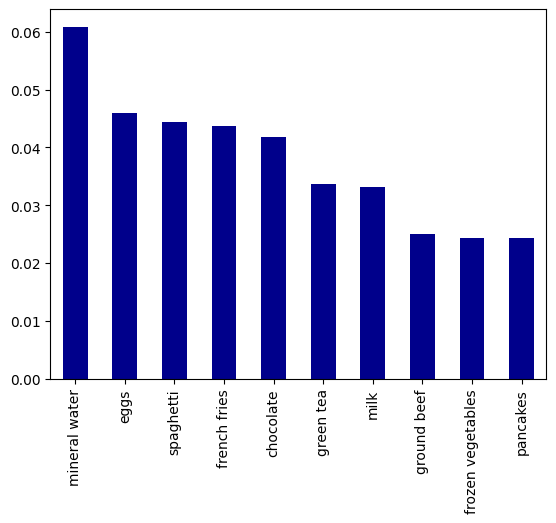

In [37]:
top_10.plot(kind='bar',color='darkblue')

<Axes: >

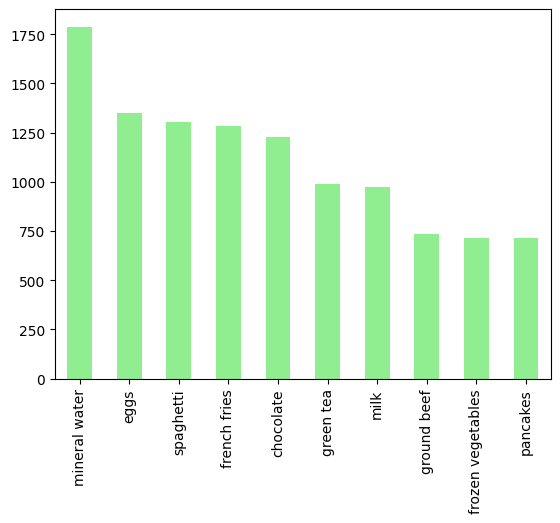

In [38]:
df.stack().value_counts()[:10].plot(kind='bar',color='lightgreen')

### Building the model

In [39]:
from apyori import apriori

In [59]:
4*7 / df.shape[0]

0.0037328356219170776

In [69]:
## Creating the rules
rules = apriori(transactions=transactions,min_support=0.004,min_confidence=0.2,min_lift=3,min_length=0,max_length=2)

In [70]:
results = list(rules)
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

In [71]:
results[0]

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

In [72]:
results[0][0]

frozenset({'chicken', 'light cream'})

In [57]:
tuple(results[0][0])

('chicken', 'light cream')

In [61]:
results[0][1]

0.004532728969470737

In [65]:
tuple(results[0][2])

(OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395),)

In [73]:
def inspect(results):
    ## Creating the lists
    item_sets = []
    supports = []
    confidencies = []
    lhs = []
    rhs = []
    lifts = []
    for result in results:
        for subset in result[2]:
            item_sets.append(tuple(result[0]))
            supports.append(result[1])
            lhs.append(subset[0])
            rhs.append(subset[1])
            confidencies.append(subset[2])
            lifts.append(subset[3])

    return list(zip(item_sets,supports,confidencies,lhs,rhs,lifts))

In [74]:
results_df = pd.DataFrame(inspect(results),columns=['item_set','support','confidence','lefthandside','righthandside', 'lift'])
results_df                                        

,item_set,support,confidence,lefthandside,righthandside,lift
0,"(chicken, light cream)",0.004533,0.290598,(light cream),(chicken),4.843951
1,"(escalope, mushroom cream sauce)",0.005733,0.300699,(mushroom cream sauce),(escalope),3.790833
2,"(escalope, pasta)",0.005866,0.372881,(pasta),(escalope),4.700812
3,"(herb & pepper, ground beef)",0.015998,0.323450,(herb & pepper),(ground beef),3.291994
4,"(tomato sauce, ground beef)",0.005333,0.377358,(tomato sauce),(ground beef),3.840659
5,"(whole wheat pasta, olive oil)",0.007999,0.271493,(whole wheat pasta),(olive oil),4.122410
6,"(pasta, shrimp)",0.005066,0.322034,(pasta),(shrimp),4.506672


In [75]:
results_df.sort_values('lift',ascending=False)

,item_set,support,confidence,lefthandside,righthandside,lift
0,"(chicken, light cream)",0.004533,0.290598,(light cream),(chicken),4.843951
2,"(escalope, pasta)",0.005866,0.372881,(pasta),(escalope),4.700812
6,"(pasta, shrimp)",0.005066,0.322034,(pasta),(shrimp),4.506672
5,"(whole wheat pasta, olive oil)",0.007999,0.271493,(whole wheat pasta),(olive oil),4.122410
4,"(tomato sauce, ground beef)",0.005333,0.377358,(tomato sauce),(ground beef),3.840659
1,"(escalope, mushroom cream sauce)",0.005733,0.300699,(mushroom cream sauce),(escalope),3.790833
3,"(herb & pepper, ground beef)",0.015998,0.323450,(herb & pepper),(ground beef),3.291994
